In [1]:
import numpy as np 
import pandas as pd     
import seaborn as sns   
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


import warnings         
warnings.filterwarnings("ignore")


In [2]:
dfe = pd.read_csv("dataset/encoded-train.csv")

In [3]:
X = dfe[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third']]

yy = pd.cut(dfe['SP'], bins=3, labels=['Low', 'Medium', 'High'])  # Creating the target column
label_encoder = LabelEncoder()
label_encoder.fit(yy)
y = label_encoder.transform(yy)

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Price_Category'])], axis=1)

resampled_df.tail()
print(resampled_df['Price_Category'])

0        1
1        1
2        1
3        1
4        1
        ..
17197    2
17198    2
17199    2
17200    2
17201    2
Name: Price_Category, Length: 17202, dtype: int32


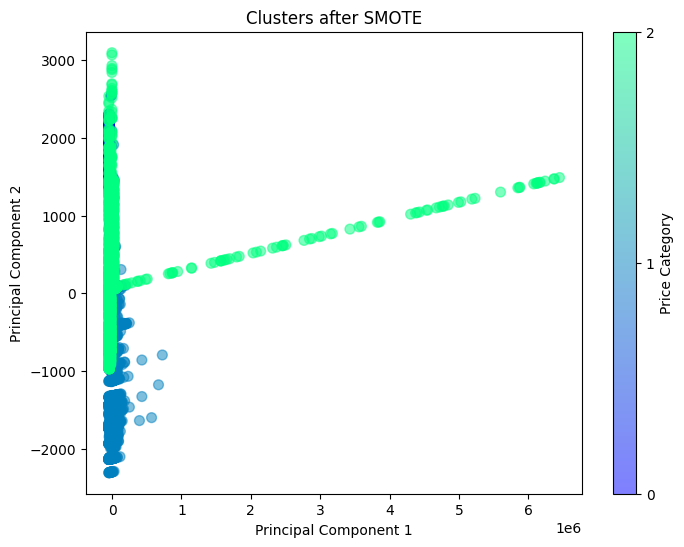

            PC1          PC2        PC3       PC4       PC5       PC6  \
0  -9231.949949 -1341.339772 -13.711216 -0.303307 -1.378101 -0.120790   
1  -4231.865929 -1725.015138 -19.639867  6.188923  3.145759  0.155151   
2  36768.122485 -1667.367908 -14.481815  3.857478 -1.829877 -2.162477   
3  -9562.033984  -956.212252  15.301249  2.727048  1.419660  0.138503   
4  36767.077226 -1458.625114  34.950382  1.993088 -4.845060  0.763327   

        PC7       PC8       PC9      PC10      PC11      PC12          PC13  \
0  0.055090 -0.052170 -0.793287  0.056609 -0.150032  0.000190  7.150382e-19   
1 -0.324603 -0.353456 -0.087260 -0.152358 -0.116858 -0.002398 -4.970826e-16   
2 -0.341896 -0.180635 -0.380811 -0.060084  0.009199 -0.002395 -3.117279e-16   
3  1.000699  1.141303  0.336183  0.285474 -0.022201 -0.003030  7.633145e-16   
4  0.318578 -0.237604 -0.370383  0.005793  0.116004 -0.002059  1.013117e-16   

           PC14          PC15  Cluster  
0  3.483872e-16 -1.058044e-15        1  
1  2

In [4]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_resampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_resampled, cmap='winter', s=50, alpha=0.5)
plt.title('Clusters after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(ticks=range(len(label_encoder.classes_)), label='Price Category')
plt.show()

pca_cluster_data = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])])
pca_cluster_data['Cluster'] = y_resampled  

print(pca_cluster_data.head())

In [5]:
resampled_df.to_csv('dataset/resampled-train.csv', index=False)

In [6]:
resampled_df.head()

,ODO,Year,Age,Mileage,Engine,Power,Seats,Fuel_Diesel,Fuel_Petrol,Transmission_Automatic,Transmission_Manual,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Price_Category
0,41000,2015,8,19.670,1582.0,126.20,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,46000,2011,12,15.625,1199.0,88.70,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,87000,2012,11,20.770,1248.0,88.76,7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,40670,2013,10,15.200,1968.0,140.80,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,86999,2013,10,23.080,1461.0,63.10,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
